# For me own Review:

Table is called a dataframe short for df and a columm is called a series

useful df functions:

.head, .shape, .info, .describe

to access specific column will use df_name["column name"] and then filter rows as  dog[dogs["date of birth"] > 50]

for categricla data use the isin method to filter rows.

sorting example:

# Sort homelessness by descending family members
homelessness_fam = homelessness.sort_values("family_members", ascending=False)

# Sort homelessness by region, then descending family members
homelessness_reg_fam = homelessness.sort_values(["region", "family_members"], ascending=[True, False])

# Print the top few rows
print(homelessness_reg_fam.head())

# Filter categorical data
canu = ["California", "Arizona", "Nevada", "Utah"]

mojave_homelessness = homelessness[homelessness["state"].isin(canu)]

print(mojave_homelessness)

# Using filter and creating new columsn to find specific data to find "Which state has the highest number of homeless individuals per 10,000 people in the state?" Combine your new pandas skills to find out

-> Create indiv_per_10k col as homeless individuals per 10k state pop

homelessness["indiv_per_10k"] = 10000 * homelessness["individuals"] / homelessness["state_pop"]

-> Subset rows for indiv_per_10k greater than 20

high_homelessness = homelessness[homelessness["indiv_per_10k"] > 20]

-> Sort high_homelessness by descending indiv_per_10k

high_homelessness_srt = high_homelessness.sort_values("indiv_per_10k", ascending=False)

-> From high_homelessness_srt, select the state and indiv_per_10k cols

result = high_homelessness_srt[["state","indiv_per_10k"]]

-> See the result
print(result)

# More Advanced: Filtering Data & Apply Statistical Functions

We can filter rows in a DataFrame based on a condition and then apply statistical functions to a specific column:

df[df['condition']][column_name].statistics_function()

# Grouping Data (Groupby)

You can group data by a condition and calculate statistics within each group.

This process is commonly referred to as "split-apply-combine."

df.groupby('condition')[column_name].statistics_function()





# Main focus for this Project:

BIG Question: What influences sleep quality and how this contributes to a personas BMI level. Will take a look at how differnt variables relate and reflect the life quality. This is a very important aspect of life so now by learning through these various particapants will be able to find the best approach to improving someone life style.
Questions?

What drives somsone to have a normal bmi level?
How does excerise and sleep levels relate to someones health?
and more... 

In [84]:
import numpy as np #  particularly useful when dealing with arrays and matrices
import pandas as pd #Pandas is a powerful data manipulation and analysis library built on top of NumPy.
# It's particularly well-suited for handling structured data and is widely used in data science and machine learning workflows.
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sci


- Use scikit-learn for traditional machine learning tasks, rapid prototyping, small to medium-sized datasets, and standard preprocessing tasks.
- Use TensorFlow for deep learning, handling large-scale datasets, production deployment, advanced machine learning techniques, and tasks requiring high flexibility and performance.

In [8]:
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Visual Example and Classification Example:

Task: Classify whether a customer will buy a product (Yes/No).
Input Features: Age, Income, Browsing History.
Output: "Yes" or "No".
Regression Example:

Task: Predict the price of a house.
Input Features: Size of the house, Number of bedrooms, Location.
Output: A continuous value representing the price of the house (e.g., $250,000).

In [112]:
# reading in our data using .read_csv another ways are
# - pd.read_excel, pd.read_sql, pd.read_json, pd.read_html,

df = pd.read_csv("/Users/evercampos/DataS/Sleep_health_and_lifestyle_dataset.csv")


# Create a mapping dictionary
BMI_mapping = {"Normal": 1, "Normal Weight": 1 ,"Obese": 2, "Overweight": 3}
Sleep_mapping = {"None":1, "Insomnia" : 2, "Sleep Apnea": 3}
# Apply the mapping
# s = df["BMI Category"].map(BMI_mapping)
New_df = df.copy()
New_df["BMI Category"] = New_df["BMI Category"].map(BMI_mapping)
New_df["Sleep Disorder"] = New_df["Sleep Disorder"].map(Sleep_mapping)

print("\n")
New_df
# print(New_df) 

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,3,126/83,77,4200,1
1,2,Male,28,Doctor,6.2,6,60,8,1,125/80,75,10000,1
2,3,Male,28,Doctor,6.2,6,60,8,1,125/80,75,10000,1
3,4,Male,28,Sales Representative,5.9,4,30,8,2,140/90,85,3000,3
4,5,Male,28,Sales Representative,5.9,4,30,8,2,140/90,85,3000,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,3,140/95,68,7000,3
370,371,Female,59,Nurse,8.0,9,75,3,3,140/95,68,7000,3
371,372,Female,59,Nurse,8.1,9,75,3,3,140/95,68,7000,3
372,373,Female,59,Nurse,8.1,9,75,3,3,140/95,68,7000,3


# As we read this csv file what can we learn from this data

# participants consist of Male and Female

In [28]:

Male = (df["Gender"] == "Male").sum()
Female = (df["Gender"] == "Female").sum()
print("Male: " + str(Male))
print("Female: " + str(Female))


Male: 189
Female: 185


# Occupations 

In [32]:
occup = df["Occupation"].unique()
occup

array(['Software Engineer', 'Doctor', 'Sales Representative', 'Teacher',
       'Nurse', 'Engineer', 'Accountant', 'Scientist', 'Lawyer',
       'Salesperson', 'Manager'], dtype=object)

In [37]:

# df.groupby('condition')[column_name].statistics_function()
#df.groupby(df["Occupation"])["Occupation"].count()



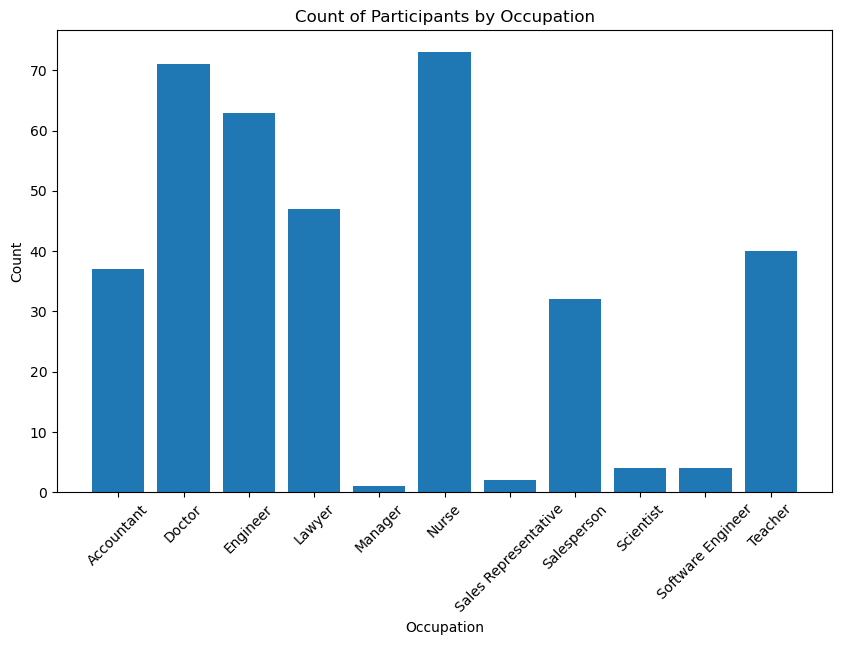

In [36]:
occupation_counts = df.groupby(df["Occupation"])["Occupation"].count()

# Convert to DataFrame
occupation_counts = occupation_counts.reset_index(name="Count")

# Plot using Matplotlib
plt.figure(figsize=(10, 6))
plt.bar(occupation_counts["Occupation"], occupation_counts["Count"])
plt.xlabel("Occupation")
plt.ylabel("Count")
plt.title("Count of Participants by Occupation")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

Summary
Original Series: The result of the group-by operation is a Series with the index as occupations and counts as values.
reset_index Method: Converts the Series into a DataFrame by turning the index into a column.
name Parameter: Specifies the name for the new column that contains the Series values.
The reset_index method is useful for converting a Series into a DataFrame and is often used after group-by operations to make the data easier to work with and plot.

# Average Age, Sleep, Daily Steps, Stress levels, Physical activity 

In [46]:
age_avg = np.average(df["Age"])
print("Age average: " + str(age_avg) + "Years Old")

sleep_avg = np.average(df["Quality of Sleep"])
print("Sleep average: " + str(sleep_avg) + " (scale: 1-10)")

steps_avg = np.average(df["Daily Steps"])
print("Steps average: " + str(steps_avg) + "steps")

stress_avg = np.average(df["Stress Level"])
print("Stress average: " + str(stress_avg) + " (scale: 1-10)")

phys_avg = np.average(df["Physical Activity Level"])
print("Physical activity (minutes/day) average: " + str(phys_avg))




Age average: 42.18449197860963Years Old
Sleep average: 7.31283422459893 (scale: 1-10
Steps average: 6816.844919786096steps
Stress average: 5.385026737967914 (scale: 1-10)
Physical activity (minutes/day) average: 59.17112299465241


Avg age is 42 years old so were currenlty dealing with middle age adults.

# Comparsion between Male and Female Sleep quality 

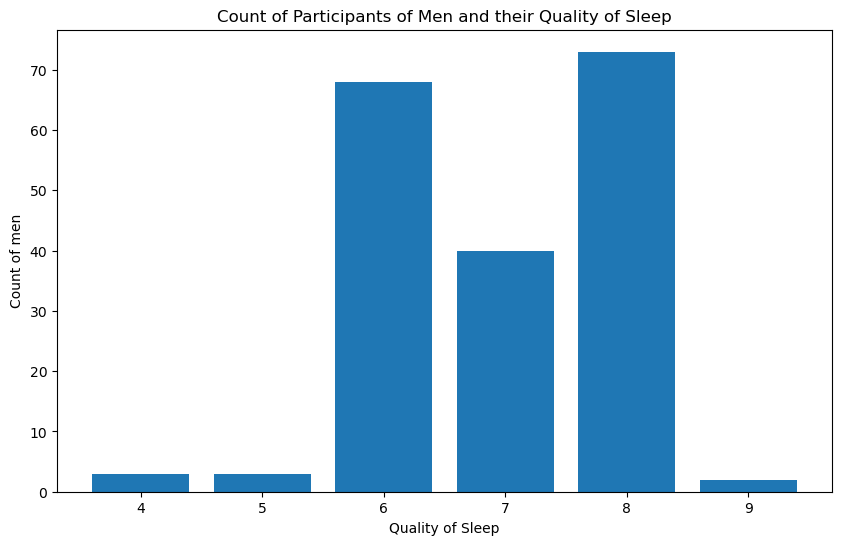

In [55]:
# print(df[df["Gender"] == "Male"].groupby("Quality of Sleep")["Gender"].count()) # will see sleep qulaity and occupation

occupation_counts = df[df["Gender"] == "Male"].groupby("Quality of Sleep")["Gender"].count()

# Convert to DataFrame
occupation_counts = occupation_counts.reset_index(name="Count")

# Plot using Matplotlib
plt.figure(figsize=(10, 6))
plt.bar(occupation_counts["Quality of Sleep"], occupation_counts["Count"])
plt.xlabel("Quality of Sleep")
plt.ylabel("Count of men")
plt.title("Count of Participants of Men and their Quality of Sleep")
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.show()

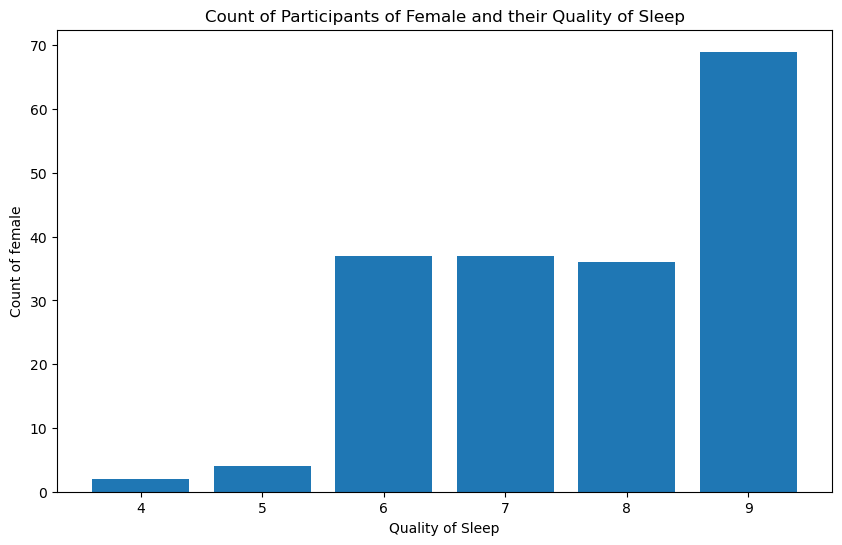

In [57]:
occupation_counts = df[df["Gender"] == "Female"].groupby("Quality of Sleep")["Gender"].count()

# Convert to DataFrame
occupation_counts = occupation_counts.reset_index(name="Count")

# Plot using Matplotlib
plt.figure(figsize=(10, 6))
plt.bar(occupation_counts["Quality of Sleep"], occupation_counts["Count"])
plt.xlabel("Quality of Sleep")
plt.ylabel("Count of female")
plt.title("Count of Participants of Female and their Quality of Sleep")
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.show()

In [71]:
avg_sleep_by_gender = df.groupby("Gender")["Quality of Sleep"].mean()
print(avg_sleep_by_gender)
print("\n")
avg_stress_by_gender = df.groupby("Gender")["Stress Level"].mean()
print(avg_stress_by_gender)
print("\n")
avg_steps_by_gender = df.groupby("Gender")["Daily Steps"].mean()
print(avg_steps_by_gender)



Gender
Female    7.664865
Male      6.968254
Name: Quality of Sleep, dtype: float64


Gender
Female    4.675676
Male      6.079365
Name: Stress Level, dtype: float64


Gender
Female    6840.540541
Male      6793.650794
Name: Daily Steps, dtype: float64


Conclusion from these grpahs and our avg we can infer that Females have a higher sleep quality than men and they also have a lower stress level. This could be to the reason that we the average is around 42 years old. At this point most their childern have either started to graute fromm college and the Mother has less of a reposibilty. Where as the Father in most cases is the head of the house and he still has most of the responsiiblty of maintaining the bills in checked and it seems to be that qulaity and stress realte to this. 

In [76]:
occupation_counts = df.groupby("Occupation")["BMI Category"].count()
occupation_counts

Occupation
Accountant              37
Doctor                  71
Engineer                63
Lawyer                  47
Manager                  1
Nurse                   73
Sales Representative     2
Salesperson             32
Scientist                4
Software Engineer        4
Teacher                 40
Name: BMI Category, dtype: int64

In [79]:
occupation_counts = df[df["Occupation"] == "Doctor"].groupby("BMI Category")["Occupation"].count()
occupation_counts

BMI Category
Normal           65
Normal Weight     2
Obese             4
Name: Occupation, dtype: int64

# Occupation vs BMI

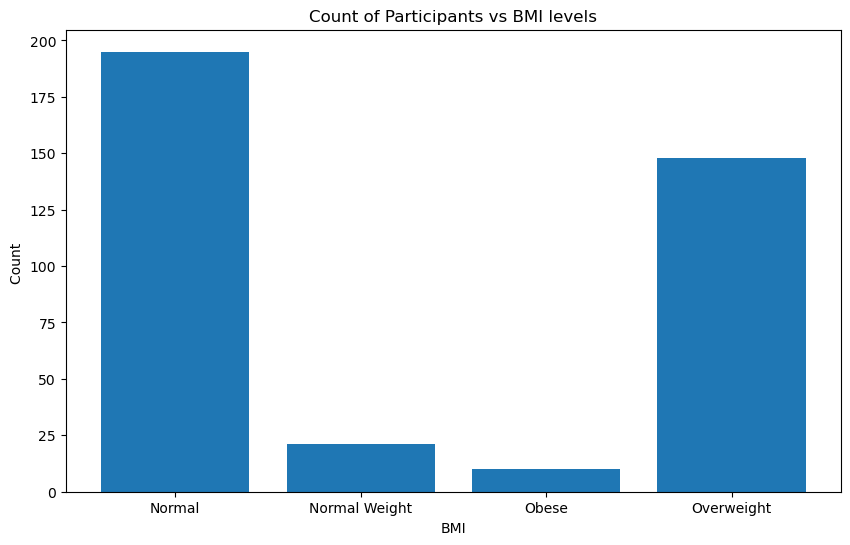

In [83]:
occupation_counts = df.groupby("BMI Category")["Occupation"].count()

# Convert to DataFrame
occupation_counts = occupation_counts.reset_index(name="Count")

# Plot using Matplotlib
plt.figure(figsize=(10, 6))
plt.bar(occupation_counts["BMI Category"], occupation_counts["Count"])
plt.xlabel("BMI")
plt.ylabel("Count ")
plt.title("Count of Participants vs BMI levels")
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.show()

# Feature vs sleep quality

### Physical activity vs sleep quality 

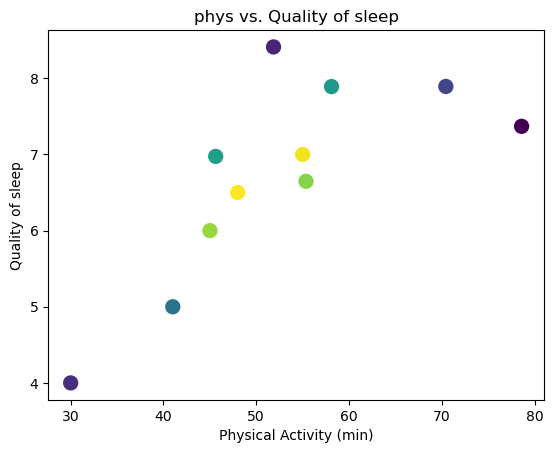

In [88]:
store_avgs = df.groupby("Occupation").mean("Physical Activity Level")

temp = store_avgs["Physical Activity Level"]
qual = store_avgs["Quality of Sleep"]

ts = np.vstack([temp,qual])
z = sci.stats.gaussian_kde(ts)(ts)

fig, plot = plt.subplots()

plt.title("phys vs. Quality of sleep")
plt.xlabel("Physical Activity (min)")
plt.ylabel("Quality of sleep")

plot.scatter(temp, qual, c=z, s=100)

plt.show()

#### Notice that as the minutes of the physical activity increases we also see a increase of our sleep quality

# BMI vs Sleep Quality

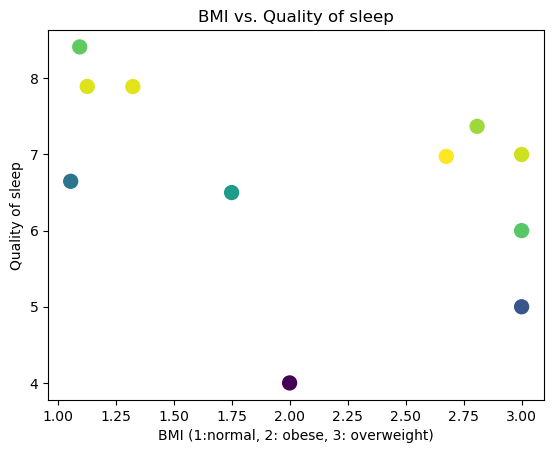

In [104]:
occup_avg = New_df.groupby("Occupation").mean("BMI Category")

temp = occup_avg["BMI Category"]
qual = occup_avg["Quality of Sleep"]

ts = np.vstack([temp,qual])
z = sci.stats.gaussian_kde(ts)(ts)

fig, plot = plt.subplots()

plt.title("BMI vs. Quality of sleep")
plt.xlabel("BMI (1:normal, 2: obese, 3: overweight)")
plt.ylabel("Quality of sleep")

plot.scatter(temp, qual, c=z, s=100)

plt.show()

##### As we conducted a label encoding to change our categorical data form bmi levels to numerical data as shown on the x-axis

# Sleep duration vs Sleep Quality 

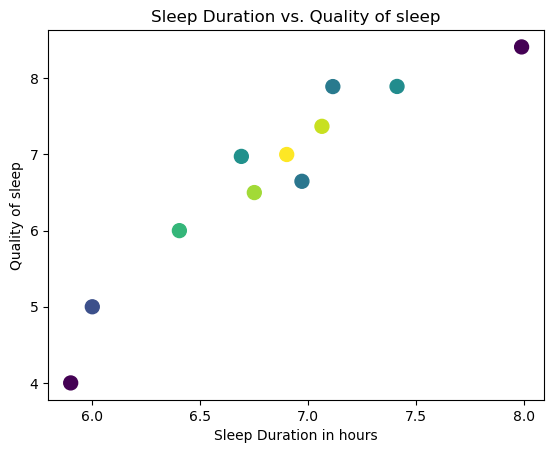

In [105]:
occup_avg = New_df.groupby("Occupation").mean("Sleep Duration")

temp = occup_avg["Sleep Duration"]
qual = occup_avg["Quality of Sleep"]

ts = np.vstack([temp,qual])
z = sci.stats.gaussian_kde(ts)(ts)

fig, plot = plt.subplots()

plt.title("Sleep Duration vs. Quality of sleep")
plt.xlabel("Sleep Duration in hours")
plt.ylabel("Quality of sleep")

plot.scatter(temp, qual, c=z, s=100)

plt.show()

As, this perserves a common statement that many doctors suggest that 8 hours of sleep is the ideal amount hours that an adult should sleep to have a high value day, from our graph we can see a similar pattern as each occupation amount of hours increase we see the qulaity levels increase as well. 

Anova Test

Null Hypothesis and Alternate Hypothesis for an Anova Test below.
#
H0: If Sleep Disorder of a person (None, Insomnia, Sleep Apnea) does not have a affect on a persons sleep quality
#
HA: The Sleep Disorder of a person (None, Insomnia, Sleep Apnea) does have a affect on a person sleep quality

In [128]:
import scipy.stats as sc

contingency_tables = pd.crosstab(New_df['Quality of Sleep'] , New_df['Sleep Disorder'])
print(contingency_tables)

# Extract contingency tables for each visibility level
low = contingency_tables[1].values
medium = contingency_tables[2].values
high = contingency_tables[3].values

stat, p = sc.f_oneway(
    low,
    medium,
    high
)

p

Sleep Disorder      1   2   3
Quality of Sleep             
4                   0   1   4
5                   0   4   3
6                  40  32  33
7                  40  34   3
8                 101   5   3
9                  38   1  32


0.19792401553778144

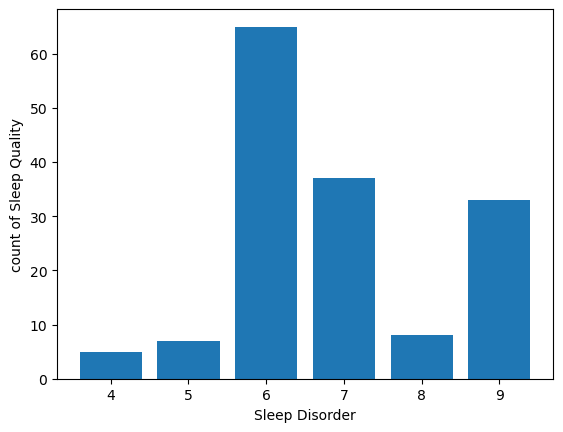

In [120]:

sleep_val = New_df[(New_df['Sleep Disorder'] == 2) | (New_df['Sleep Disorder'] == 3)]['Quality of Sleep'].value_counts()
# sleep_val
plt.bar(sleep_val.index, sleep_val)
plt.xlabel('Sleep Disorder')
plt.ylabel('count of Sleep Quality')
plt.show()